# ANN 06: 성능 분석

이번 챕터에서는 Fashion-MNIST 분류 모델의 성능을 분석합니다.

📌 목표:
- 학습 곡선 (loss / accuracy) 시각화
- 혼동 행렬 (Confusion Matrix)
- 분류 리포트 (Precision, Recall, F1-score)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 한글 폰트 설정
if platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


2025-09-01 19:39:10.140948: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-01 19:39:07.367504: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-01 19:39:09.913869: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_split=0.1,
                    batch_size=32,
                    verbose=1)


/home/ccd/dl/v_dl/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-09-01 19:39:12.575675: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10


2025-09-01 19:39:12.816753: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 169344000 exceeds 10% of free system memory.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7871 - loss: 0.5905 - val_accuracy: 0.8513 - val_loss: 0.4052
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8396 - loss: 0.4419 - val_accuracy: 0.8535 - val_loss: 0.3877
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8535 - loss: 0.4023 - val_accuracy: 0.8650 - val_loss: 0.3635
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8598 - loss: 0.3839 - val_accuracy: 0.8687 - val_loss: 0.3563
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8644 - loss: 0.3710 - val_accuracy: 0.8767 - val_loss: 0.3351
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8699 - loss: 0.3545 - val_accuracy: 0.8777 - val_loss: 0.3313
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8749 - loss: 0.3430 - val_accuracy: 0.8788 - val_loss: 0.3279
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8759 - loss: 0.3373 - val_accurac

## 📈 학습 곡선 (loss / accuracy)


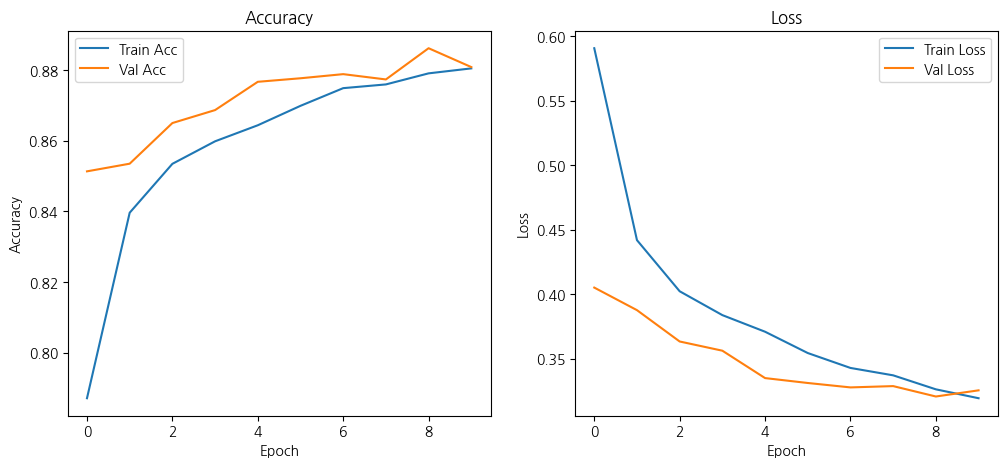

In [3]:
plt.figure(figsize=(12, 5))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# 손실
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


## 🔎 혼동 행렬 (Confusion Matrix)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


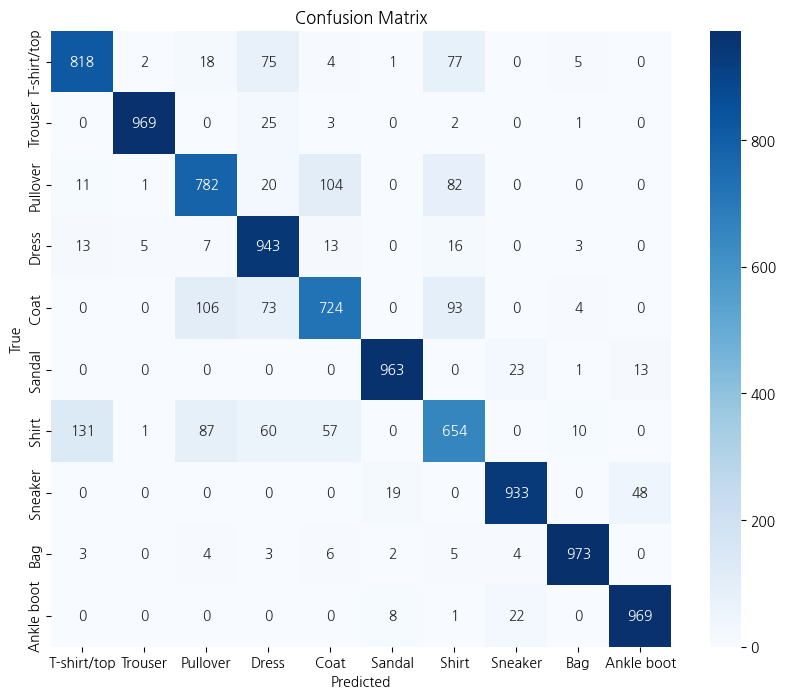

In [4]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## 📝 분류 리포트
- Precision: 양성 예측 정확도
- Recall: 실제 양성 중에서 맞춘 비율
- F1-score: Precision과 Recall의 조화평균


In [5]:
print(classification_report(y_test, y_pred, target_names=class_names))


              precision    recall  f1-score   support

 T-shirt/top       0.84      0.82      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.78      0.78      0.78      1000
       Dress       0.79      0.94      0.86      1000
        Coat       0.79      0.72      0.76      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.70      0.65      0.68      1000
     Sneaker       0.95      0.93      0.94      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.94      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## ✅ 정리
- 학습 곡선으로 과적합/과소적합 여부 확인 가능
- 혼동 행렬로 어떤 클래스에서 오류가 많은지 확인
- Precision/Recall/F1-score로 세부 성능 분석

👉 다음 챕터: **핵심 키워드 정리 & 실습 패키지 요약**
